In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [13]:
def f(x):
    return 10 * np.sin(4 * x) + 1 * np.sin(15 * x)

In [14]:
x = np.linspace(0, 2 * np.pi, 500)
y = f(x)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [16]:
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1).to(device)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.00001, random_state=42)

In [35]:
x_new = np.linspace(2 * np.pi,  3* np.pi, 2000)
y_new = f(x_new)
x_new_tensor = torch.tensor(x_new, dtype=torch.float32).unsqueeze(1).to(device)
y_new_tensor = torch.tensor(y_new, dtype=torch.float32).unsqueeze(1).to(device)


In [22]:
class CNO1D(nn.Module):
    def __init__(self):
        super(CNO1D, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv1d(256, 256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension for Conv1D
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = x.mean(dim=2)  # Global average pooling
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:
model = CNO1D().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
num_epochs = 5000
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/5000], Loss: 38.8156
Epoch [200/5000], Loss: 19.0404
Epoch [300/5000], Loss: 7.9561
Epoch [400/5000], Loss: 2.7682
Epoch [500/5000], Loss: 1.9976
Epoch [600/5000], Loss: 2.3551
Epoch [700/5000], Loss: 1.5413
Epoch [800/5000], Loss: 4.0414
Epoch [900/5000], Loss: 1.4896
Epoch [1000/5000], Loss: 2.7186
Epoch [1100/5000], Loss: 1.4609
Epoch [1200/5000], Loss: 1.2244
Epoch [1300/5000], Loss: 1.1861
Epoch [1400/5000], Loss: 0.9731
Epoch [1500/5000], Loss: 2.3294
Epoch [1600/5000], Loss: 0.8047
Epoch [1700/5000], Loss: 1.0221
Epoch [1800/5000], Loss: 0.8554
Epoch [1900/5000], Loss: 1.1679
Epoch [2000/5000], Loss: 2.7883
Epoch [2100/5000], Loss: 0.3956
Epoch [2200/5000], Loss: 0.3365
Epoch [2300/5000], Loss: 0.1765
Epoch [2400/5000], Loss: 0.3832
Epoch [2500/5000], Loss: 0.1007
Epoch [2600/5000], Loss: 0.1423
Epoch [2700/5000], Loss: 0.1093
Epoch [2800/5000], Loss: 0.1571
Epoch [2900/5000], Loss: 0.3582
Epoch [3000/5000], Loss: 0.1137
Epoch [3100/5000], Loss: 0.1393
Epoch [3200/500

In [36]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    test_loss = criterion(y_pred, y_test)

print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.0912


In [37]:
with torch.no_grad():
    y_pred_full = model(x_tensor).cpu()

In [38]:
with torch.no_grad():
    y_new_pred = model(x_new_tensor).cpu()

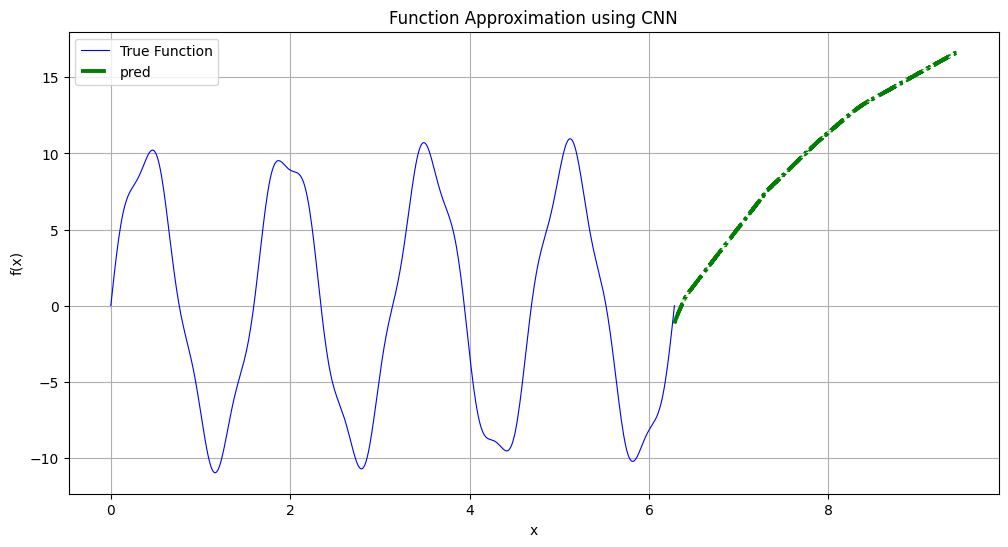

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="True Function", color="blue", linewidth=0.8)
# plt.plot(x, y_pred_full.numpy(), label="Predicted Function", color="red", linestyle="dotted")
# plt.plot(x_new, y_new, label="Test Predictions", color="orange", linestyle="dashed", marker="x")
plt.plot(x_new, y_new_pred.numpy(), label="pred", color="green",linewidth=2.8, linestyle="dashdot")
plt.title("Function Approximation using CNN")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()